In [15]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
result_paths = ["/data/yzhouc01/FILIP-MS/experiments/20250930_optimized_flare_42/main_result/result_MassSpecGym_retrieval_candidates_mass.pkl",
"/data/yzhouc01/FILIP-MS/experiments/20250930_optimized_flare_42/result_top5.pkl",
"/data/yzhouc01/FILIP-MS/experiments/20250930_optimized_flare_42/result_softmax05.pkl",
"/data/yzhouc01/FILIP-MS/experiments/20250930_optimized_flare_42/result_geom1e-6.pkl"]

methods = ['standard', 'top5', 'softmax', 'geom']

In [4]:
result_dict = {}
for p, m in zip(result_paths, methods):
    with open(p, 'rb') as f:
        result_dict[m] = pickle.load(f)

In [9]:
topk = [1,5,20]
result_data = []
for m in result_dict:
    curr_result = []    
    for k in  topk:
        curr_result.append(len(result_dict[m][result_dict[m]['rank'] <= k])/len(result_dict[m]))
    result_data.append(curr_result)

result_df = pd.DataFrame(result_data, index=result_dict.keys(), columns=topk)
result_df

1         5         20
standard  0.431533  0.755924  0.928913
top5      0.237810  0.538164  0.807986
softmax   0.112041  0.352301  0.730178
geom      0.192413  0.378332  0.502335

In [18]:
def get_target_score(scores, labels):
    return np.array(scores)[np.array(labels)][0]

def get_avg_cand_scores(scores, labels):
    return np.mean(np.array(scores)[~np.array(labels)])

for m, r in result_dict.items():
    r['target_score'] = r.apply(lambda row: get_target_score(row['scores'], row['labels']), axis=1)
    r['avg_cand_scores'] = r.apply(lambda row: get_avg_cand_scores(row['scores'], row['labels']), axis=1)


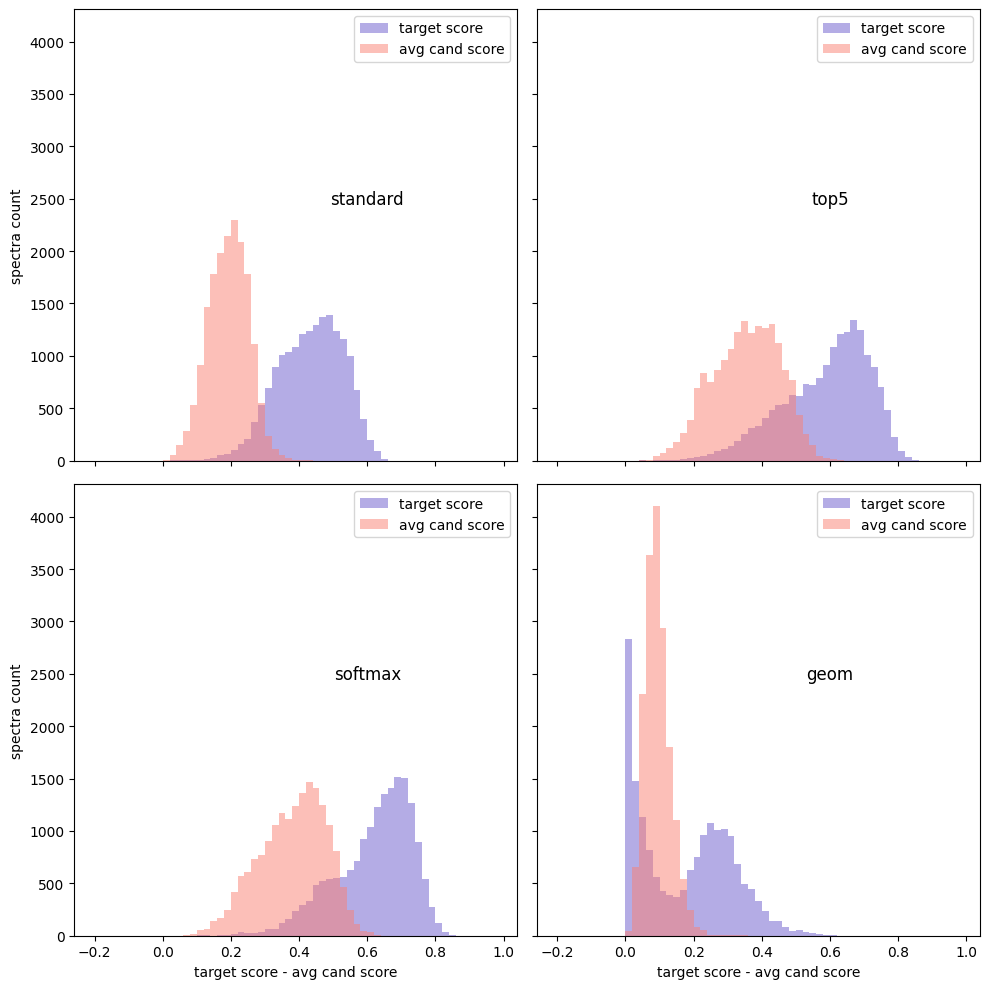

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
i =0
j = 0
for m, r in result_dict.items():
    axs[i, j].hist(r['target_score'], bins=np.arange(-0.2, 1, 0.02), label=f'target score', alpha=0.5, color='slateblue')
    axs[i, j].hist(r['avg_cand_scores'], bins=np.arange(-0.2, 1, 0.02), label=f'avg cand score', alpha=0.5, color='salmon')
    axs[i, j].annotate(m, (0.6, 2500), ha='center', va='center', fontsize=12)
    axs[i, j].legend()

    if i % 2 == 0 and j == 1:
        i += 1
        j = 0
    else:
        j += 1

axs[0, 0].set_ylabel('spectra count')
axs[1, 0].set_ylabel('spectra count')
axs[1, 0].set_xlabel('target score - avg cand score')
axs[1, 1].set_xlabel('target score - avg cand score')

plt.tight_layout()
plt.show()